 Mount Google Drive

In [3]:
import os

folder_path = '/content/drive/MyDrive/qwabe'
files = os.listdir(folder_path)
print("📂 Files in 'qwabe':")
for f in files:
    print("-", f)


📂 Files in 'qwabe':
- stock_market_june2025.csv
- stock_data_july_2025.csv


 Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

 Load Data

In [5]:
june_path = '/content/drive/MyDrive/qwabe/stock_market_june2025.csv'
july_path = '/content/drive/MyDrive/qwabe/stock_data_july_2025.csv'

june_df = pd.read_csv(june_path)
july_df = pd.read_csv(july_path)

 Merge Data

In [6]:
df = pd.concat([june_df, july_df], ignore_index=True)


Standardize Columns

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

Detect Close Price Column

In [8]:
close_col = None
for col in df.columns:
    if "close" in col:
        close_col = col
        break
if close_col is None:
    raise ValueError("❌ No 'Close' price column found.")


Detect Date Column

In [9]:
date_col = None
for col in df.columns:
    if "date" in col:
        date_col = col
        break
if date_col is None:
    raise ValueError("❌ No 'Date' column found.")

Parse dates with flexible format

In [10]:
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col])

Sort by date

In [11]:
df = df.sort_values(date_col)

Create Binary Target

In [12]:
df['target'] = (df[close_col].shift(-1) > df[close_col]).astype(int)
df = df.dropna()


Features

In [13]:
df['daily_return'] = df[close_col].pct_change().fillna(0)
features = ['daily_return']
X = df[features]
y = df['target']

Split Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

 Random Forest

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

 Evaluation

In [17]:
print("📊 Logistic Regression Report:\n", classification_report(y_test, log_pred))
print("🌲 Random Forest Report:\n", classification_report(y_test, rf_pred))

📊 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.76      0.51      0.61        99
           1       0.63      0.84      0.72        98

    accuracy                           0.67       197
   macro avg       0.69      0.67      0.66       197
weighted avg       0.69      0.67      0.66       197

🌲 Random Forest Report:
               precision    recall  f1-score   support

           0       0.62      0.56      0.59        99
           1       0.59      0.65      0.62        98

    accuracy                           0.60       197
   macro avg       0.61      0.60      0.60       197
weighted avg       0.61      0.60      0.60       197



Confusion Matrices

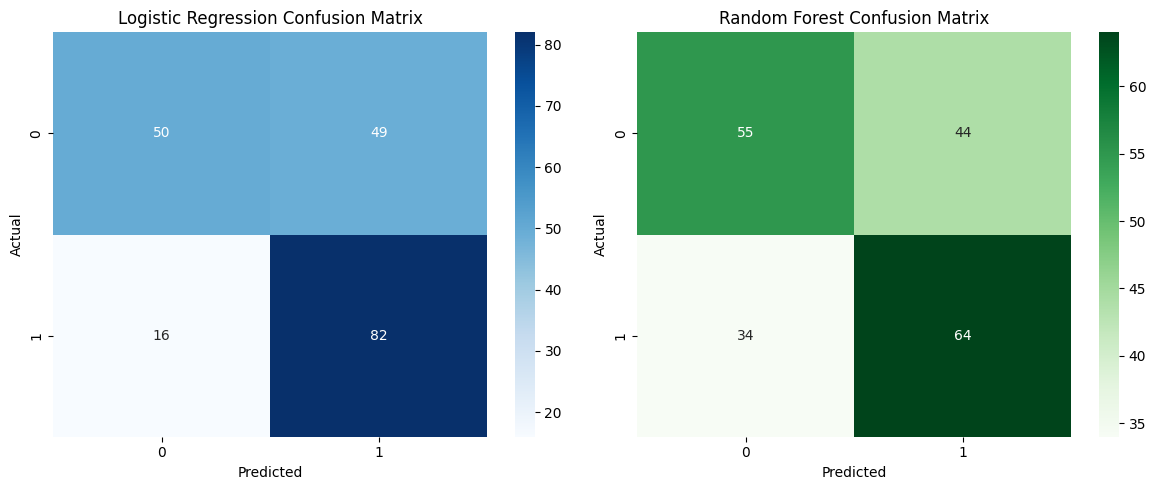

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='d', ax=axs[0], cmap="Blues")
axs[0].set_title("Logistic Regression Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', ax=axs[1], cmap="Greens")
axs[1].set_title("Random Forest Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Visualization of Price and Target

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


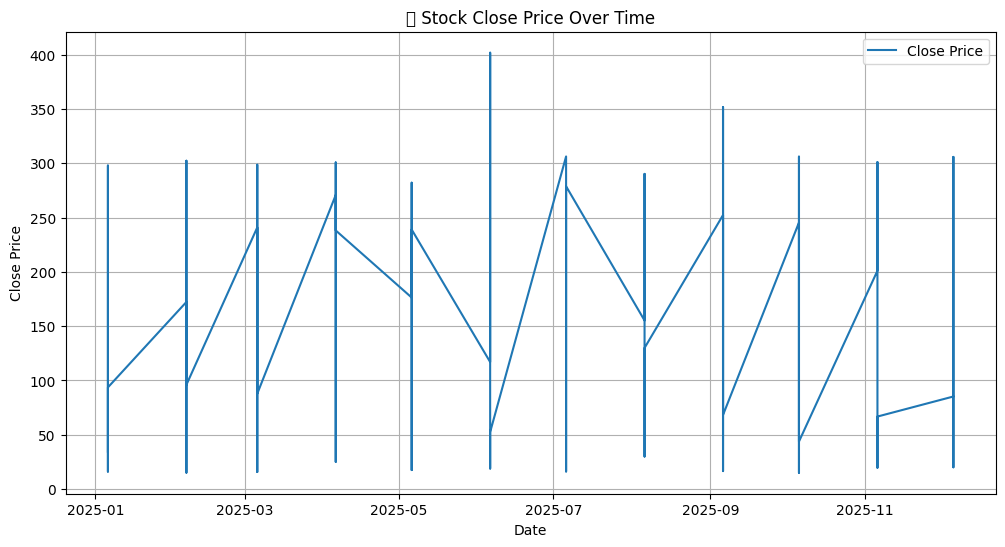

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df[date_col], df[close_col], label='Close Price')
plt.title("📈 Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()